<a href="https://colab.research.google.com/github/camilafaiza26/kelompok8_apm/blob/main/TB_Desicion_Tree_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd #for manipulating the csv data
import numpy as np #for mathematical calculation

In [35]:
data = pd.read_csv("credit-card-fix.csv") #importing the dataset from the disk
data.head() #viewing some row of the dataset

,no_ktp,no_hp,age,pendidikan_terakhir,status_perkawinan,kepemilikan_tempat_tinggal,jenis_kelamin,waktu_kepemilikan_rumah,pendapatan_netto,jumlah_anak_dlm_tanggungan,...,total_mutasi_credit_12,total_mutasi_deb_3,total_mutasi_deb_6,total_mutasi_deb_12,financial_monthly_expense,financial_monthly_nett_income,score,grade,plafond,description
0,3.200000e+15,6.280000e+12,27,SMA,Menikah,MilikKeluarga,F,6/28/2016,11000000,0,...,0,10884000,10884000,0,4500000,8000000,55.1439,6.0,3700000.0,APPROVE
1,3.180000e+15,6.280000e+12,31,SMA,Menikah,MilikKeluarga,M,6/28/2016,75000,2,...,223720141,7184460,223685020,223685020,2000000,5500000,29.6065,8.0,0.0,REJECT
2,3.520000e+15,6.290000e+12,32,Diploma,JandaDuda,MilikSendiri,F,6/28/2016,10000000,0,...,0,0,0,0,1000000,5650000,20.1649,9.0,0.0,REJECT
3,3.670000e+15,6.280000e+12,30,SMA,Menikah,MilikKeluarga,F,6/28/2016,9900000,1,...,0,3323400,5161400,0,4000000,4900000,68.1796,5.0,4550000.0,APPROVE
4,1.200000e+15,6.280000e+12,21,SMA,BelumMenikah,MilikKeluarga,M,6/28/2016,5000000,1,...,0,15723500,44045056,0,1500000,4500000,55.5508,6.0,3700000.0,APPROVE


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   no_ktp                         31527 non-null  float64
 1   no_hp                          31527 non-null  float64
 2   age                            31527 non-null  int64  
 3   pendidikan_terakhir            31527 non-null  object 
 4   status_perkawinan              31527 non-null  object 
 5   kepemilikan_tempat_tinggal     31527 non-null  object 
 6   jenis_kelamin                  31527 non-null  object 
 7   waktu_kepemilikan_rumah        31527 non-null  object 
 8   pendapatan_netto               31527 non-null  int64  
 9   jumlah_anak_dlm_tanggungan     31527 non-null  int64  
 10  freq_mutasi_credit_3           31527 non-null  int64  
 11  freq_mutasi_credit_6           31527 non-null  int64  
 12  freq_mutasi_credit_12          31527 non-null 

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
Le = LabelEncoder()

In [39]:
data['pendidikan_terakhir'] = Le.fit_transform(data['pendidikan_terakhir'])
data['kepemilikan_tempat_tinggal'] = Le.fit_transform(data['kepemilikan_tempat_tinggal'])
data['status_perkawinan'] = Le.fit_transform(data['status_perkawinan'])
data['jenis_kelamin'] = Le.fit_transform(data['jenis_kelamin'])
data['description'] = Le.fit_transform(data['description'])

In [40]:
data

,no_ktp,no_hp,age,pendidikan_terakhir,status_perkawinan,kepemilikan_tempat_tinggal,jenis_kelamin,waktu_kepemilikan_rumah,pendapatan_netto,jumlah_anak_dlm_tanggungan,...,total_mutasi_credit_12,total_mutasi_deb_3,total_mutasi_deb_6,total_mutasi_deb_12,financial_monthly_expense,financial_monthly_nett_income,score,grade,plafond,description
0,3.200000e+15,6.280000e+12,27,5,2,1,0,6/28/2016,11000000,0,...,0,10884000,10884000,0,4500000,8000000,55.1439,6.0,3700000.0,0
1,3.180000e+15,6.280000e+12,31,5,2,1,1,6/28/2016,75000,2,...,223720141,7184460,223685020,223685020,2000000,5500000,29.6065,8.0,0.0,1
2,3.520000e+15,6.290000e+12,32,0,1,3,0,6/28/2016,10000000,0,...,0,0,0,0,1000000,5650000,20.1649,9.0,0.0,1
3,3.670000e+15,6.280000e+12,30,5,2,1,0,6/28/2016,9900000,1,...,0,3323400,5161400,0,4000000,4900000,68.1796,5.0,4550000.0,0
4,1.200000e+15,6.280000e+12,21,5,0,1,1,6/28/2016,5000000,1,...,0,15723500,44045056,0,1500000,4500000,55.5508,6.0,3700000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,1.220000e+15,6.280000e+12,25,5,0,1,1,5/28/2016,5100000,0,...,0,9943332,12111758,0,1500000,4500000,38.7789,8.0,0.0,1
31523,3.270000e+15,6.290000e+12,39,5,2,3,1,6/2/2016,1550000,2,...,0,4635200,9272000,0,5000000,10000000,30.9204,8.0,0.0,1
31524,3.580000e+15,6.280000e+12,47,1,2,3,0,6/2/2016,4319000,0,...,0,10861800,22214922,0,500000,3500000,26.2776,8.0,0.0,1
31525,3.320000e+15,6.290000e+12,28,4,2,1,1,6/2/2017,2000000,2,...,0,13500,6653000,0,2000000,6000000,23.2202,9.0,0.0,1


In [41]:
# data['temp'] = data['temp'].fillna(0)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_names = ['kepemilikan_tempat_tinggal','status_perkawinan','pendapatan_netto','jumlah_anak_dlm_tanggungan',
                 'freq_mutasi_credit_3',	'freq_mutasi_credit_6',	'freq_mutasi_credit_12','freq_mutasi_deb_3',
                 'freq_mutasi_deb_6','freq_mutasi_deb_12',
                 'total_mutasi_credit_3',
                 'total_mutasi_credit_6',
                 'total_mutasi_credit_12',
                 'total_mutasi_deb_3',
                 'total_mutasi_deb_6',
                 'total_mutasi_deb_12',
                 'financial_monthly_expense','financial_monthly_nett_income']
features = data[feature_names]
data2 = data.description

In [43]:
x_train, x_test, y_train, y_test = train_test_split(features, data2, test_size=0.2, random_state=1)

In [44]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8355534411671424


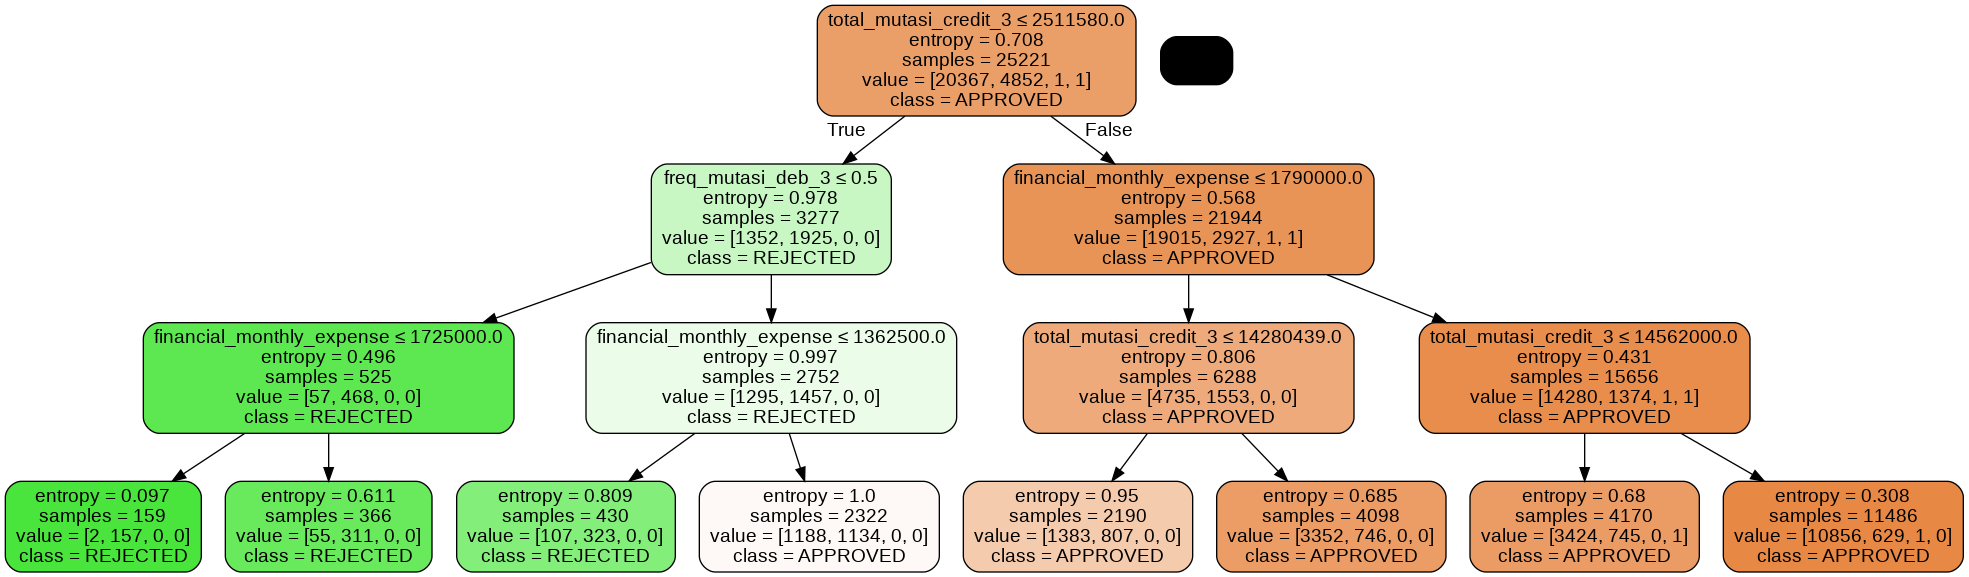

In [45]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(clf, out_file=None,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=["APPROVED","REJECTED"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('image.png')
Image(graph.create_png())